In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [3]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

mscaler = MinMaxScaler()
orde = OrdinalEncoder(dtype=np.int8) 
ohe = OneHotEncoder(dtype=np.int8, sparse_output=False)


In [4]:
ct1 = ColumnTransformer(transformers=[('encode', mscaler, [0,1])], remainder='passthrough').set_output(transform='pandas')
ct1 = ct1.fit_transform(tips)
ct1

encode__total_bill  encode__tip remainder__sex remainder__smoker  \
0              0.291579     0.001111         Female                No   
1              0.152283     0.073333           Male                No   
2              0.375786     0.277778           Male                No   
3              0.431713     0.256667           Male                No   
4              0.450775     0.290000         Female                No   
..                  ...          ...            ...               ...   
239            0.543779     0.546667           Male                No   
240            0.505027     0.111111         Female               Yes   
241            0.410557     0.111111           Male               Yes   
242            0.308965     0.083333           Male                No   
243            0.329074     0.222222         Female                No   

    remainder__day remainder__time  remainder__size  
0              Sun          Dinner                2  
1              Sun          Dinner                3  
2              Sun          Dinner                3  
3              Sun          Dinner                2  
4              Sun          Dinner                4  
..             ...             ...              ...  
239            Sat          Dinner                3  
240            Sat          Dinner                2  
241            Sat          Dinner                2  
242            Sat          Dinner                2  
243           Thur          Dinner                2  

[244 rows x 7 columns]

In [5]:
ct2 = ColumnTransformer(transformers=[('encode', orde, [2,3,5])], remainder='passthrough').set_output(transform='pandas')
ct2 = ct2.fit_transform(ct1)
ct2

encode__remainder__sex  encode__remainder__smoker  \
0                         0                          0   
1                         1                          0   
2                         1                          0   
3                         1                          0   
4                         0                          0   
..                      ...                        ...   
239                       1                          0   
240                       0                          1   
241                       1                          1   
242                       1                          0   
243                       0                          0   

     encode__remainder__time  remainder__encode__total_bill  \
0                          0                       0.291579   
1                          0                       0.152283   
2                          0                       0.375786   
3                          0                       0.431713   
4                          0                       0.450775   
..                       ...                            ...   
239                        0                       0.543779   
240                        0                       0.505027   
241                        0                       0.410557   
242                        0                       0.308965   
243                        0                       0.329074   

     remainder__encode__tip remainder__remainder__day  \
0                  0.001111                       Sun   
1                  0.073333                       Sun   
2                  0.277778                       Sun   
3                  0.256667                       Sun   
4                  0.290000                       Sun   
..                      ...                       ...   
239                0.546667                       Sat   
240                0.111111                       Sat   
241                0.111111                       Sat   
242                0.083333                       Sat   
243                0.222222                      Thur   

     remainder__remainder__size  
0                             2  
1                             3  
2                             3  
3                             2  
4                             4  
..                          ...  
239                           3  
240                           2  
241                           2  
242                           2  
243                           2  

[244 rows x 7 columns]

In [6]:
ct3 = ColumnTransformer(transformers=[('encode', ohe, [-2])], remainder='passthrough').set_output(transform='pandas')
ct3 = ct3.fit_transform(ct2)
ct3

encode__remainder__remainder__day_Fri  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
239                                      0   
240                                      0   
241                                      0   
242                                      0   
243                                      0   

     encode__remainder__remainder__day_Sat  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
239                                      1   
240                                      1   
241                                      1   
242                                      1   
243                                      0   

     encode__remainder__remainder__day_Sun  \
0                                        1   
1                                        1   
2                                        1   
3                                        1   
4                                        1   
..                                     ...   
239                                      0   
240                                      0   
241                                      0   
242                                      0   
243                                      0   

     encode__remainder__remainder__day_Thur  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
239                                       0   
240                                       0   
241                                       0   
242                                       0   
243                                       1   

     remainder__encode__remainder__sex  remainder__encode__remainder__smoker  \
0                                    0                                     0   
1                                    1                                     0   
2                                    1                                     0   
3                                    1                                     0   
4                                    0                                     0   
..                                 ...                                   ...   
239                                  1                                     0   
240                                  0                                     1   
241                                  1                                     1   
242                                  1                                     0   
243                                  0                                     0   

     remainder__encode__remainder__time  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
239                                   0   
240                                   0   
241                                   0   
242                                   0   
243                                   0   

     remainder__remainder__encode__total_bill  \
0                                    0.291579   
1                                    0.152283   
2                                    0.375786   
3                                    0.431713   
4                                    0.450775   
..       

In [7]:
ct3['target'] = ct3['remainder__remainder__encode__total_bill']
del ct3['remainder__remainder__encode__total_bill'] 
ct3

encode__remainder__remainder__day_Fri  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
239                                      0   
240                                      0   
241                                      0   
242                                      0   
243                                      0   

     encode__remainder__remainder__day_Sat  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
239                                      1   
240                                      1   
241                                      1   
242                                      1   
243                                      0   

     encode__remainder__remainder__day_Sun  \
0                                        1   
1                                        1   
2                                        1   
3                                        1   
4                                        1   
..                                     ...   
239                                      0   
240                                      0   
241                                      0   
242                                      0   
243                                      0   

     encode__remainder__remainder__day_Thur  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
239                                       0   
240                                       0   
241                                       0   
242                                       0   
243                                       1   

     remainder__encode__remainder__sex  remainder__encode__remainder__smoker  \
0                                    0                                     0   
1                                    1                                     0   
2                                    1                                     0   
3                                    1                                     0   
4                                    0                                     0   
..                                 ...                                   ...   
239                                  1                                     0   
240                                  0                                     1   
241                                  1                                     1   
242                                  1                                     0   
243                                  0                                     0   

     remainder__encode__remainder__time  remainder__remainder__encode__tip  \
0                                     0                           0.001111   
1                                     0                           0.073333   
2                                     0                           0.277778   
3                                     0                           0.256667   
4                                     0                           0.290000   
..                                  ...                                ...   
239                                   0                           0.546667   
240                                   0                           0.111111   
241                                   0                           0.111111   
242                                   0 

In [8]:
# del ct3['remainder__remainder__encode__total_bill']


In [9]:
oxirgi = ct3.copy()

In [10]:
X = np.array(oxirgi.iloc[:, :-1])
# y = np.array(oxirgi.iloc[:, -1]).reshape(-1,1)
y = np.array(oxirgi.iloc[:, -1])


In [11]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# nscaler = MinMaxScaler().set_output(transform = 'pandas')
# sscaler = StandardScaler()

In [12]:
# X_norm = nscaler.fit_transform(X)
# y_norm = nscaler.fit_transform(y)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)
X_train.shape

(195, 9)

In [14]:
from sklearn.linear_model import LinearRegression

chiziqli = LinearRegression()

In [15]:
chiziqli.fit(X_train, y_train)
y_predict = chiziqli.predict(X_test)
y_predict_tr = chiziqli.predict(X_train)

In [16]:
y_predict[:5]

array([0.16106402, 0.10384733, 0.24687257, 0.46443334, 0.65196353])

In [17]:
y_test[:5]

array([0.11395057, 0.0875576 , 0.19710934, 0.3640553 , 0.55990783])

In [18]:
from sklearn.metrics import explained_variance_score as evs
evs(y_train, y_predict_tr)

0.6250437721936679

In [19]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_predict)

0.3794933242376316

In [20]:
from sklearn.metrics import r2_score as r2
r2(y_train, y_predict_tr)

0.6250437721936679

In [21]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_predict)

0.11414187646463672

In [22]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_predict)

0.027294196132536537

In [23]:
# plt.scatter(X_train, y_train)
# plt.plot(X_train, y_predict_tr, color='red')

ValueError: x and y must be the same size

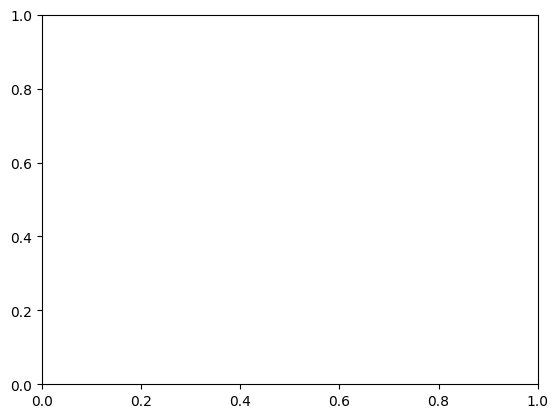

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')

In [25]:
tips.tip.nlargest(5)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
Name: tip, dtype: float64

In [26]:
arr = np.array([1.7, 6, 3, 9.3, 9.5, 7.3, 5.1, -4]).reshape(-1,1)
y_predict_arr = chiziqli.predict(arr)

ValueError: X has 1 features, but LinearRegression is expecting 9 features as input.

In [27]:
nscaler.inverse_transform(y_train[:5])

NameError: name 'nscaler' is not defined

## Support Vector Regressor



In [ ]:
from sklearn.svm import SVR

support_v = SVR(kernel='linear')

In [29]:
support_v.fit(X_train, y_train)

y_predict_test = support_v.predict(X_test)
y_predict_train = support_v.predict(X_train)

In [30]:
y_test[:5]

array([0.11395057, 0.0875576 , 0.19710934, 0.3640553 , 0.55990783])

In [31]:
y_predict_test[:5]

array([0.16371134, 0.11232047, 0.24871033, 0.47222877, 0.63925226])

In [32]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_predict_test)

0.39883993446329813

In [33]:
from sklearn.metrics import r2_score as r2
r2(y_train, y_predict_train)

0.6191348683882201

In [34]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_predict_test)

0.026443197755524228

In [35]:
from sklearn.metrics import mean_squared_error as mse
mse(y_train, y_predict_train)

0.012211181083052485

In [ ]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


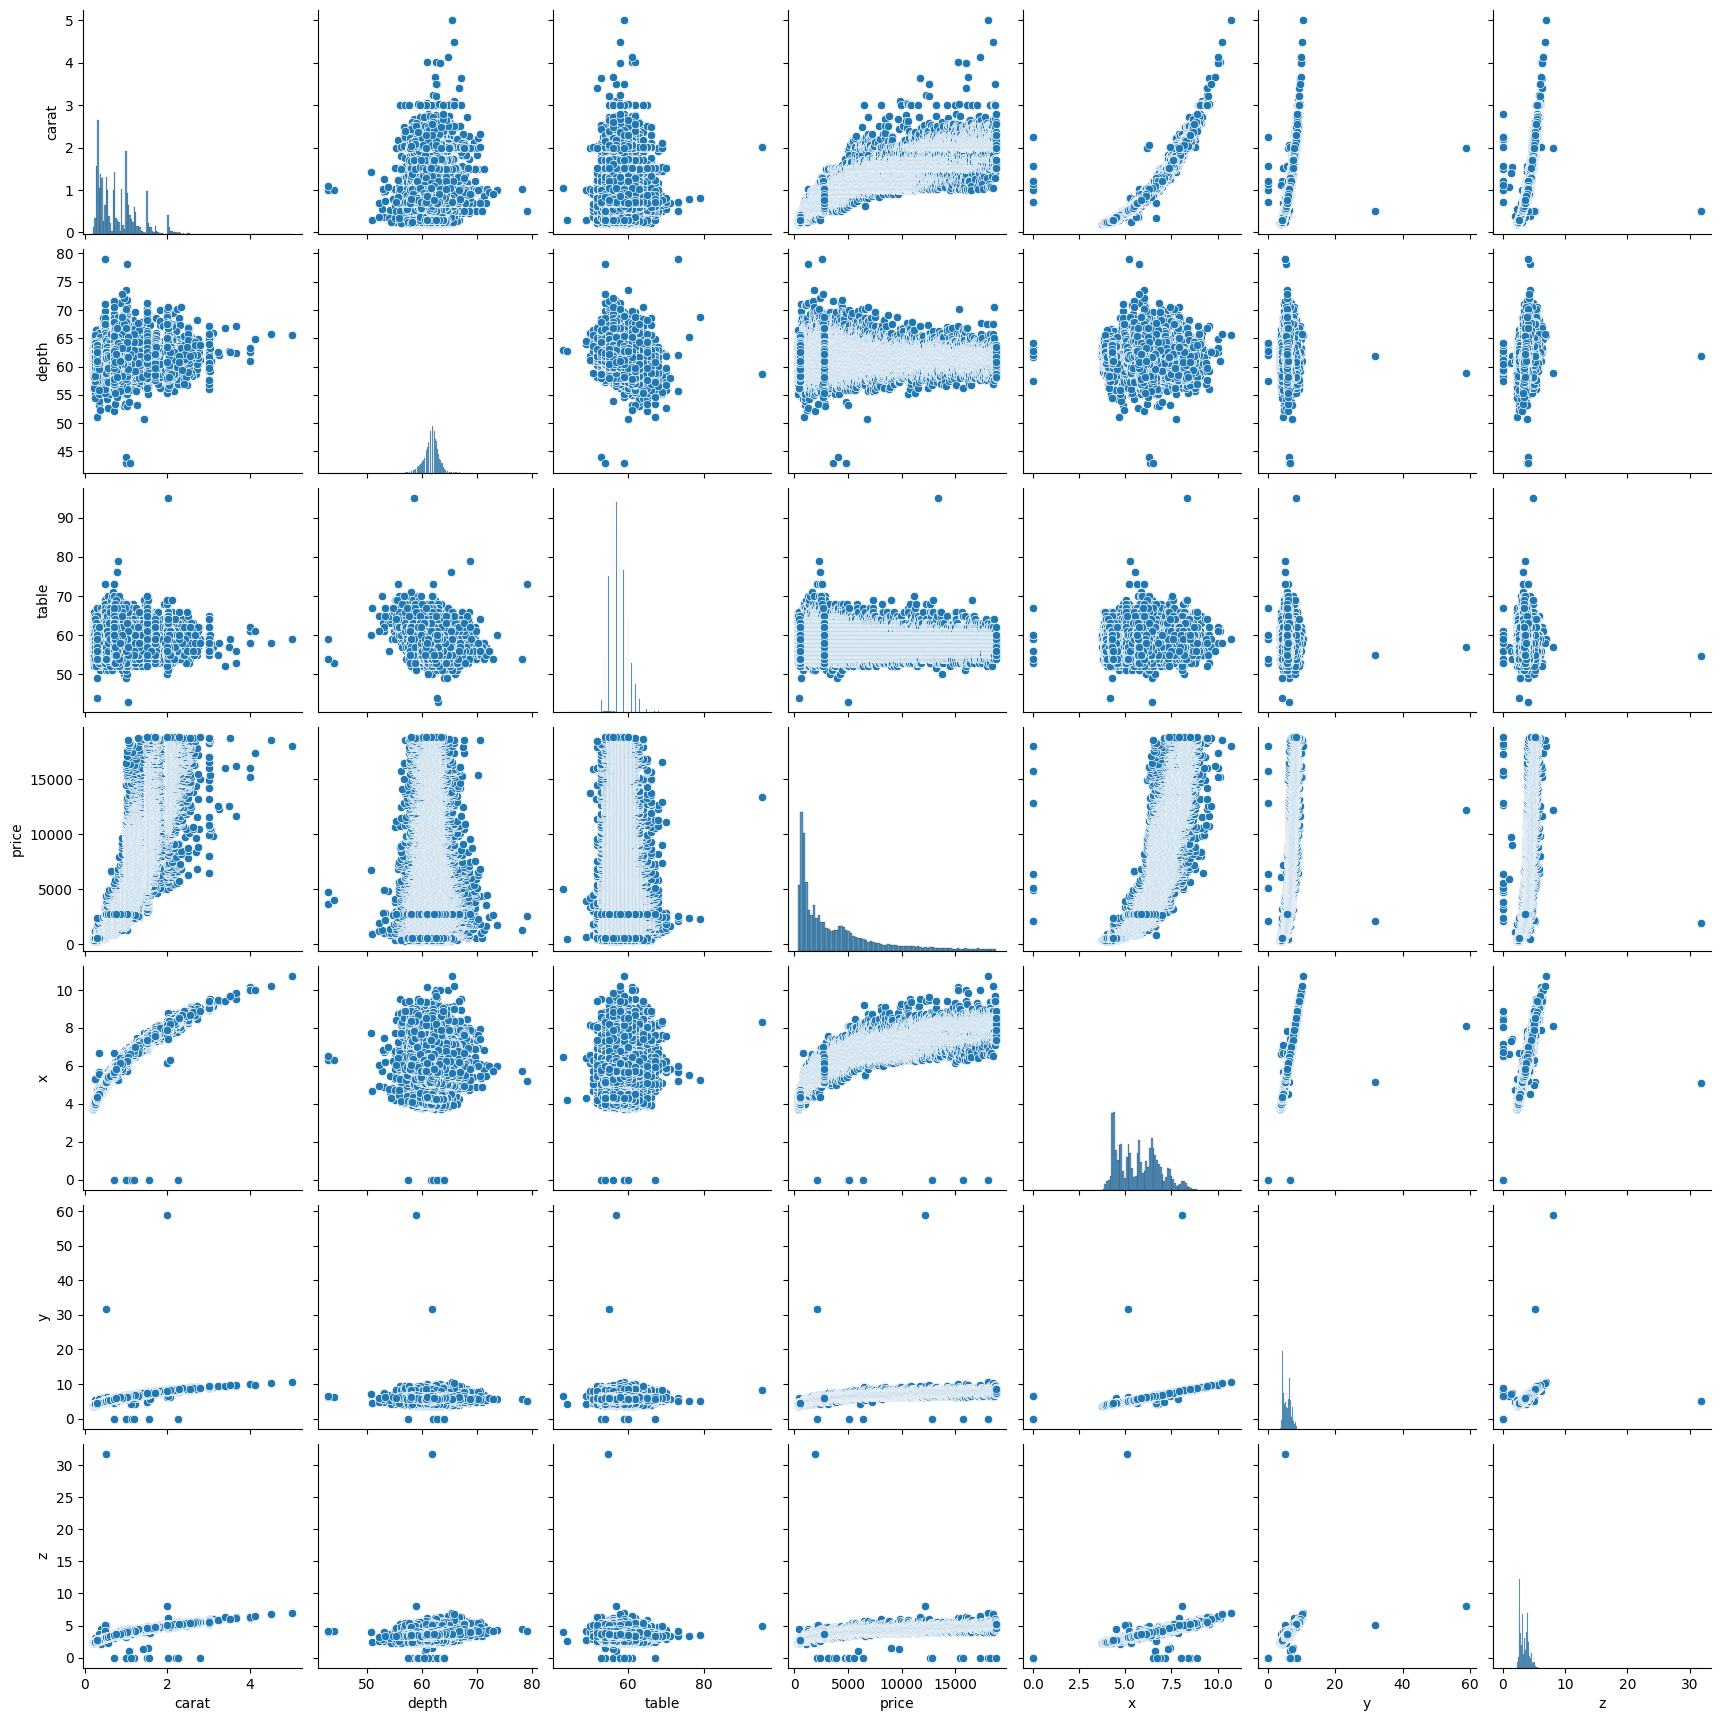

In [6]:
sns.pairplot(diamonds)

In [32]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

sscaler = StandardScaler()
orde = OrdinalEncoder(dtype=np.int8, categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]) 
ohe = OneHotEncoder(dtype=np.int8, sparse_output=False, drop='first')

In [33]:
ct = ColumnTransformer(transformers=[('stands', sscaler, [0,4,5,6,7,8,9]),('ohe', ohe, [2]), ('orde', orde, [1,3])], remainder='passthrough').set_output(transform='pandas')
ct = ct.fit_transform(diamonds)
ct

stands__carat  stands__depth  stands__table  stands__price  stands__x  \
0          -1.198168      -0.174092      -1.099672      -0.904095  -1.587837   
1          -1.240361      -1.360738       1.585529      -0.904095  -1.641325   
2          -1.198168      -3.385019       3.375663      -0.903844  -1.498691   
3          -1.071587       0.454133       0.242928      -0.902090  -1.364971   
4          -1.029394       1.082358       0.242928      -0.901839  -1.240167   
...              ...            ...            ...            ...        ...   
53935      -0.164427      -0.662711      -0.204605      -0.294731   0.016798   
53936      -0.164427       0.942753      -1.099672      -0.294731  -0.036690   
53937      -0.206621       0.733344       1.137995      -0.294731  -0.063434   
53938       0.130927      -0.523105       0.242928      -0.294731   0.373383   
53939      -0.101137       0.314528      -1.099672      -0.294731   0.088115   

       stands__y  stands__z  ohe__color_E  ohe__color_F  ohe__color_G  \
0      -1.536196  -1.571129             1             0             0   
1      -1.658774  -1.741175             1             0             0   
2      -1.457395  -1.741175             1             0             0   
3      -1.317305  -1.287720             0             0             0   
4      -1.212238  -1.117674             0             0             0   
...          ...        ...           ...           ...           ...   
53935   0.022304  -0.054888             0             0             0   
53936   0.013548   0.100988             0             0             0   
53937  -0.047741   0.030135             0             0             0   
53938   0.337506   0.285204             0             0             0   
53939   0.118616   0.143499             0             0             0   

       ohe__color_H  ohe__color_I  ohe__color_J  orde__cut  orde__clarity  
0                 0             0             0          4              1  
1                 0             0             0          3              2  
2                 0             0             0          1              4  
3                 0             1             0          3              3  
4                 0             0             1          1              1  
...             ...           ...           ...        ...            ...  
53935             0             0             0          4              2  
53936             0             0             0          1              2  
53937             0             0             0          2              2  
53938             1             0             0          3              1  
53939             0             0             0          4              1  

[53940 rows x 15 columns]

In [34]:
diamonds.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

In [35]:
ct.head(3)

stands__carat  stands__depth  stands__table  stands__price  stands__x  \
0      -1.198168      -0.174092      -1.099672      -0.904095  -1.587837   
1      -1.240361      -1.360738       1.585529      -0.904095  -1.641325   
2      -1.198168      -3.385019       3.375663      -0.903844  -1.498691   

   stands__y  stands__z  ohe__color_E  ohe__color_F  ohe__color_G  \
0  -1.536196  -1.571129             1             0             0   
1  -1.658774  -1.741175             1             0             0   
2  -1.457395  -1.741175             1             0             0   

   ohe__color_H  ohe__color_I  ohe__color_J  orde__cut  orde__clarity  
0             0             0             0          4              1  
1             0             0             0          3              2  
2             0             0             0          1              4

<Axes: >

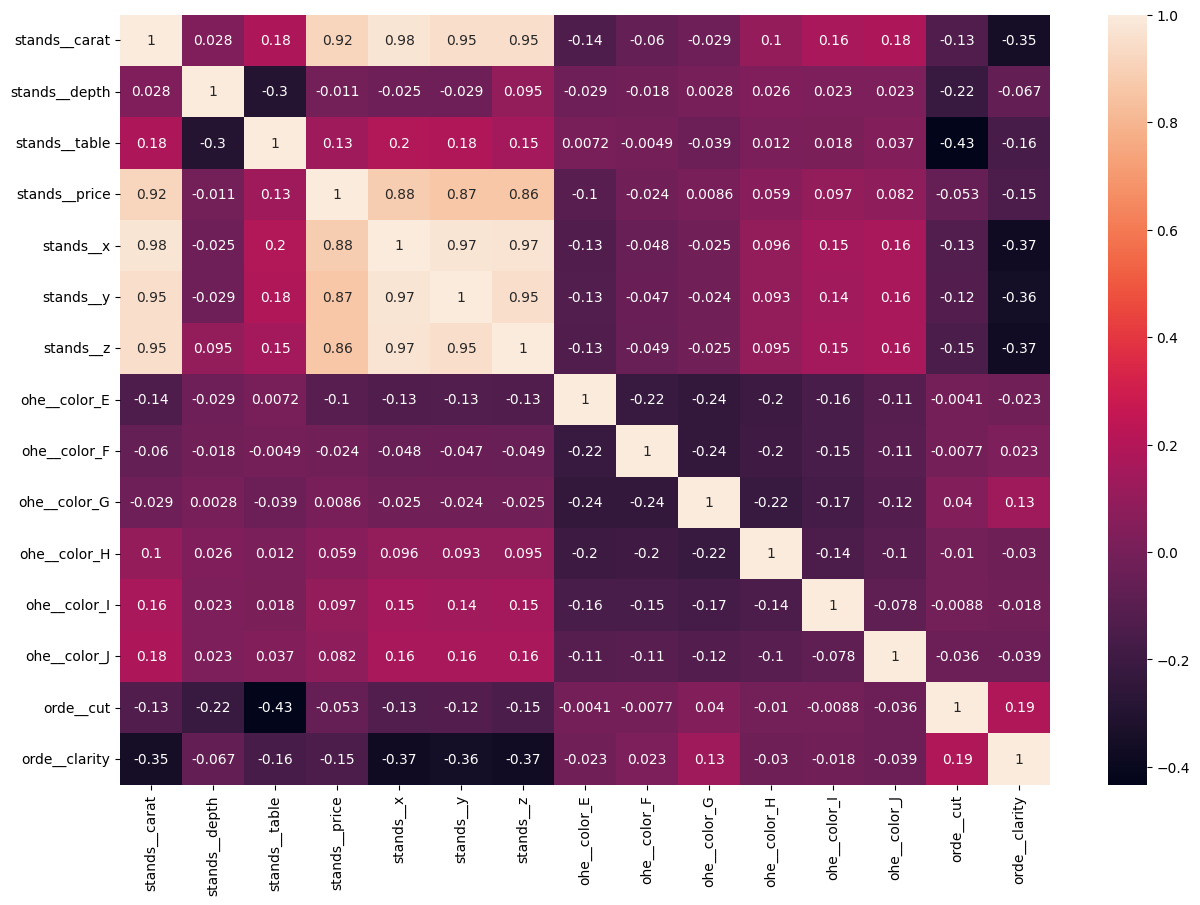

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(ct.corr(), annot=True)


In [51]:
ct.shape

(53940, 15)

In [84]:
X = np.array(ct.drop(columns=['stands__price']))
y = np.array(ct['stands__price'])

In [55]:
y.ndim

2

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
y_test.shape

(10788,)

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

chiziqli = LinearRegression()

In [73]:
chiziqli.fit(X_train, y_train)
chiziqli.score(X_train, y_train)

0.908875222377901

In [66]:
y_pred = chiziqli.predict(X_test)

In [67]:
y_pred[:5]

array([[0.32348947],
       [0.86369724],
       [0.51091052],
       [1.54023793],
       [0.22977679]])

In [68]:
y_test[:5]

array([[0.20058147],
       [0.62445444],
       [0.39534747],
       [1.21251239],
       [0.14042209]])

In [75]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2, explained_variance_score as ev

mae(y_test, y_pred), mse(y_test, y_pred)

(0.19620241688634835, 0.08836458637487554)

In [79]:
r2(y_test, y_pred), ev(y_test, y_pred)

(0.9112805767266484, 0.9113053630965398)

## Support Vector Regression

In [86]:
from sklearn.svm import SVR

svr = SVR()

In [87]:
svr.fit(X_train, y_train)
svr.score(X_train, y_train)

0.9771540957027592

In [90]:
y_pred = svr.predict(X_test)

In [91]:
mae(y_test, y_pred), mse(y_test, y_pred)

(0.08655624062115969, 0.025768394600414257)

In [92]:
r2(y_test, y_pred), ev(y_test, y_pred)

(0.9741281298151483, 0.974138593322729)

## Decision Tree Regression

In [95]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [96]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9999955165959782

In [98]:
y_pred = dt.predict(X_test)

In [99]:
mae(y_test, y_pred), mse(y_test, y_pred)

(0.08953865015854792, 0.0346659489476208)

In [100]:
r2(y_test, y_pred), ev(y_test, y_pred)

(0.965194846442117, 0.9652005852105283)

## Random Forest Regression

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000)

In [110]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.997434847146035

In [111]:
y_pred = rf.predict(X_test)

In [107]:
mae(y_test, y_pred), mse(y_test, y_pred)

(0.06790650992578703, 0.019122215801669687)

In [108]:
r2(y_test, y_pred), ev(y_test, y_pred)

(0.9808009970143982, 0.9808078464081108)

In [112]:
r2(y_test, y_pred), ev(y_test, y_pred)

(0.9810357473153163, 0.981043894495965)

In [3]:
datasets = sns.get_dataset_names()
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
taxis = sns.load_dataset('taxis')
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

In [5]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

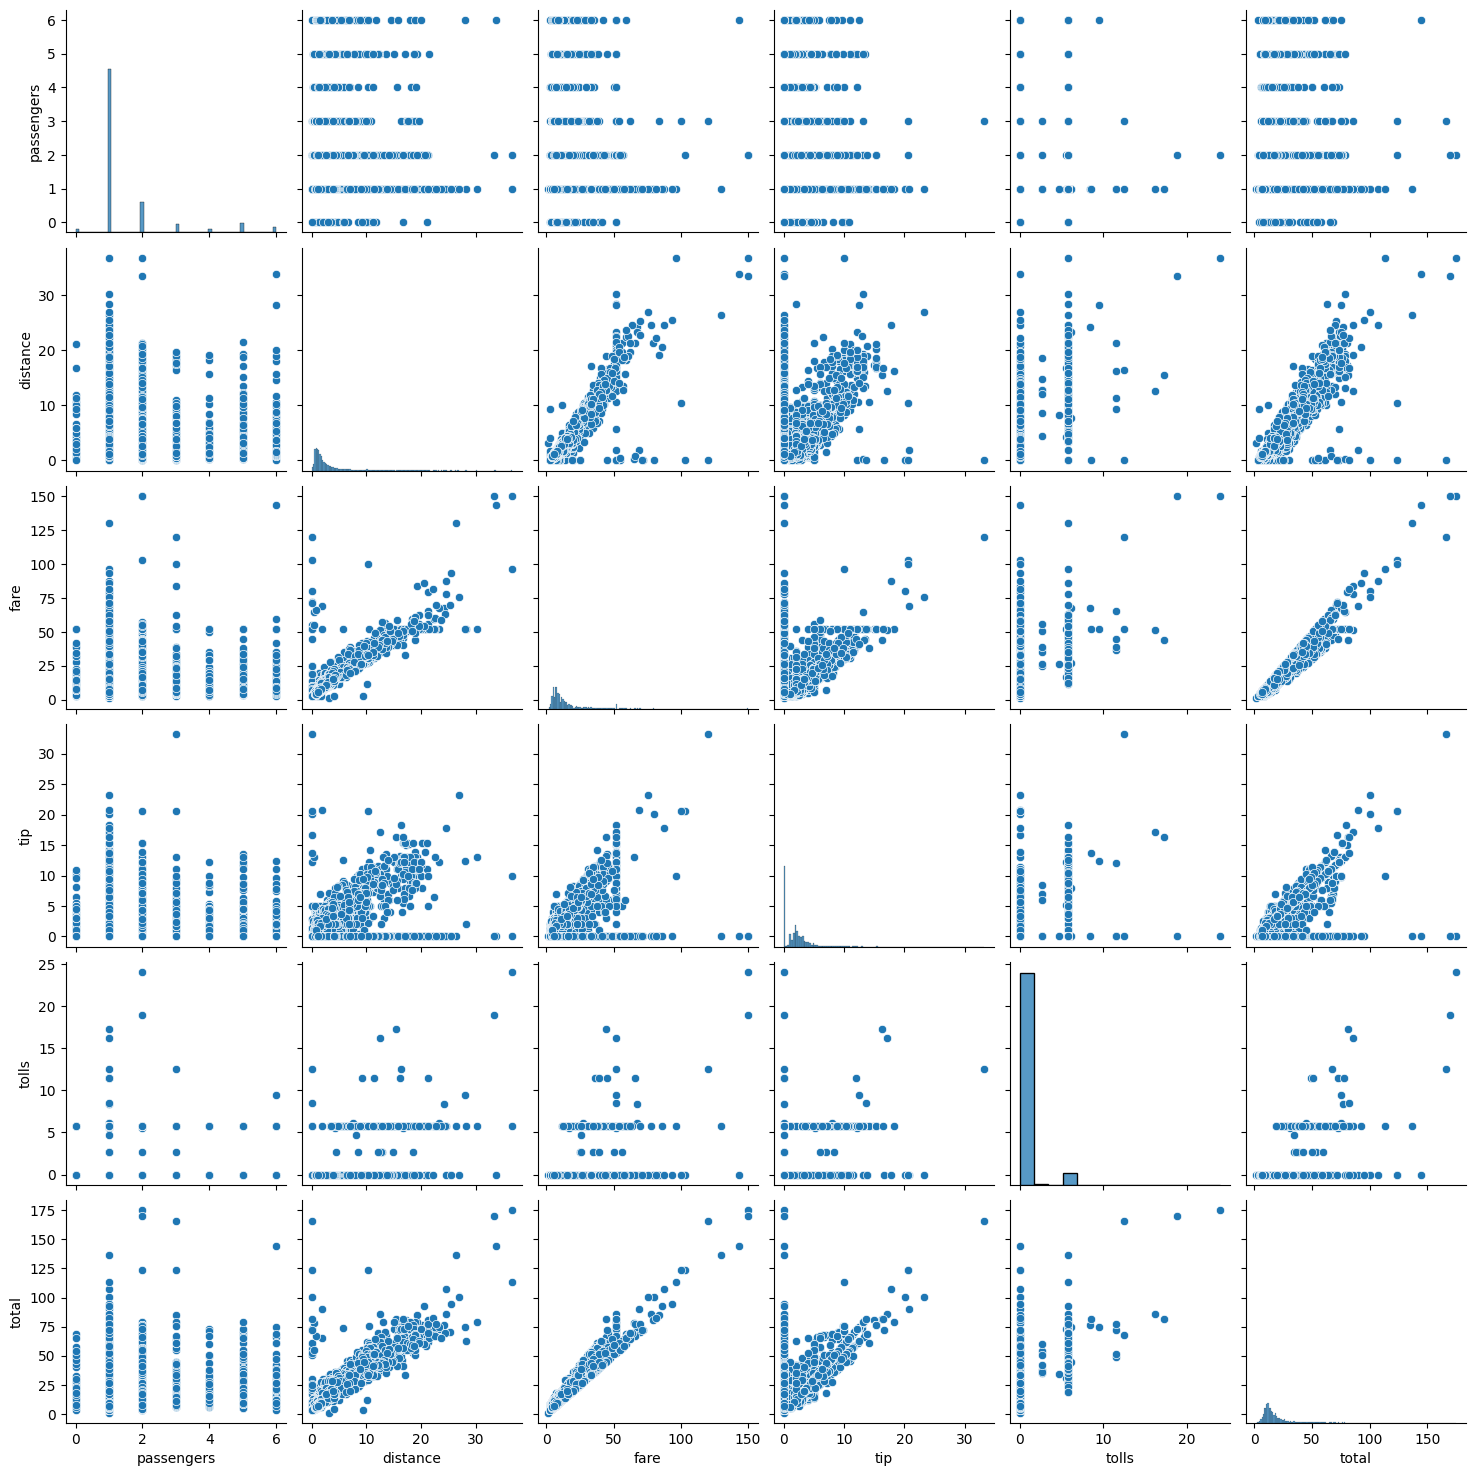

In [6]:
sns.pairplot(taxis)